# *Depression Predictive Analysis*
![depress](depress.png)

## 🔑 Objective

<div class='alert'>

-   Melakukan Data Preparation, Data Wrangling & Exploratory Data Analysis.

-   Melakukan Bivariate Analysis berserta Data Visualization

-   Working On Machine Learning
    -   Model Building (Classification)
    -   Model Evaluation
    -   Model Improvement
    -   Model Visualization

</div>

## 🔍 Exploratory Data Analysis

### Data Preparation

🔽 Import Python library yang akan digunakan

In [1]:
# Import library
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

🔽 Melakukan input data yang akan di analisa

In [2]:
# Read Data Set
depression = pd.read_csv('data_input/depression.csv')
depression.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


**Deskripsi Data**
- `Gender` : berisi informasi terkait jenis kelamin.
- `Age` : berisi informasi terkait umur responden.
- `Academic Pressure` : berisi tentang tingkat tekanan dalam proses studi.
- `Study Satisfaction` : berisi tentang informasi tingkat kepuasan dalam studi.
- `Sleep Duration` : berisi informasi tentang durasi tidur responden.
- `Dietary Habits` : berisi tentang informasi kebiasaan makan responden.
- `Have you ever had suicidal thoughts ?` : berisi tentang informasi terkait apakah responden pernah memiliki pikiran untuk bunuh diri.
- `Study Hours` : berisi informasi tentang durasi belajar tiap responden.
- `Financial Stress` : berisi informasi tentang tingkat stress responden secara finansial.
- `Family History Of Mental Illness` : berisi tentang informasi responden yang memiliki historis keluarga berpenyakit mental.

**Target**
- `Depression` : 


### Data Wrangling

🔽 Menampilkan ringkasan informasi tentang *DataFrame*

In [3]:
depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

🔽 Menampilkan tipe data dari setiap kolom dalam sebuah *DataFrame*

In [4]:
depression.dtypes

Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

🔽 Menampilkan jumlah nilai unik dalam *DataFrame*

In [5]:
depression.nunique()

Gender                                    2
Age                                      17
Academic Pressure                         5
Study Satisfaction                        5
Sleep Duration                            4
Dietary Habits                            3
Have you ever had suicidal thoughts ?     2
Study Hours                              13
Financial Stress                          5
Family History of Mental Illness          2
Depression                                2
dtype: int64

🔽 Memeriksa *Missing Values* pada *DataFrame*

In [6]:
depression.isna().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

🔽 Memeriksa *Duplicates Values* pada *DataFrame*

In [7]:
depression.duplicated().sum()

0

🔽 Menampilkan ringkasan Statistik Deskriptif pada *DataFrame*

In [8]:
cat_features = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
                'Family History of Mental Illness', 'Depression']

num_features = ['Academic Pressure', 'Study Satisfaction']

depression[cat_features] = depression[cat_features].astype('category')
depression[num_features] = depression[num_features].astype('int64')
depression.dtypes

Gender                                   category
Age                                         int64
Academic Pressure                           int64
Study Satisfaction                          int64
Sleep Duration                           category
Dietary Habits                           category
Have you ever had suicidal thoughts ?    category
Study Hours                                 int64
Financial Stress                            int64
Family History of Mental Illness         category
Depression                               category
dtype: object

In [9]:
depression.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [10]:
depression.describe(include='category')

,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,502,502,502,502,502,502
unique,2,4,3,2,2,2
top,Male,7-8 hours,Moderate,Yes,No,Yes
freq,267,128,172,260,265,252


<div class='alert alert-success'>

🔍 Hasil pemeriksaan *DataFrame* :
-   Tidak terdapat *Missing Values* pada *DataFrame*
-   Tidak terdapat *Duplicates Value* pada *DataFrame*

📌 Insights :
1.  Rata - rata koresponden berumur 26 tahun.
2.  Rata - rata jam belajar dari koresponden 6 jam.
3.  Mayoritas koresponden tidur dalam durasi 7-8 jam.
4.  Mayoritas koresponden memiliki kebiasaan makan yang seimbang.
5.  Mayoritas koresponden memiliki pikiran untuk bunuh diri.
6.  Mayoritas koresponden memiliki historis penyakit mental pada keluarga.
7.  Mayoritas koresponden depresi.

</div>

## 📊 Bivariate Analysis

📝 Bagaimana hubungan antara `Sleep Duration` dengan `Depression`?

In [11]:
cross_tab1 = pd.crosstab(index= depression['Sleep Duration'],
            columns= depression['Depression']).sort_values(by='Yes',
                                                           ascending=False)

In [12]:
cross_tab_long1 = cross_tab1.reset_index().melt(id_vars='Sleep Duration',
                                                value_vars=['Yes', 'No'],
                                                var_name='Depression',
                                                value_name='Count')

chart1 = alt.Chart(cross_tab_long1).mark_bar().encode(
    x=alt.X('Sleep Duration', sort='-y'),
    y=alt.Y('Count', title='Jumlah'),
    color= 'Depression',
    tooltip=['Sleep Duration', 'Depression', 'Count']
).properties(
    title='Hubungan antara Sleep Duration dan Depression',
    width=400,  # Lebar chart 
    height=400  # Tinggi chart
).interactive()

chart1.display()

alt.Chart(...)

📝 Bagaimana hubungan antara `Dietary Habits` dengan `Depression`?

In [13]:
cross_tab2 = pd.crosstab(index= depression['Dietary Habits'],
            columns= depression['Depression']).sort_values(by='Yes',
                                                           ascending=False)
cross_tab1

Depression,No,Yes
Sleep Duration,,
7-8 hours,61,67
5-6 hours,59,64
Less than 5 hours,59,64
More than 8 hours,71,57


In [14]:
cross_tab_long2 = cross_tab2.reset_index().melt(id_vars='Dietary Habits', 
                                             value_vars=['Yes', 'No'], 
                                             var_name='Depression', 
                                             value_name='Count')

chart2 = alt.Chart(cross_tab_long2).mark_bar().encode(
    x=alt.X('Dietary Habits', sort='-y'),
    y=alt.Y('Count', title='Jumlah'),
    color=alt.Color('Depression',scale=alt.Scale(range=['blue', 'red'])),
    tooltip=['Dietary Habits', 'Depression', 'Count']
).properties(
    title='Hubungan antara Dietary Habits dan Depression',
    width=400,  # Atur lebar chart menjadi 600 piksel
    height=400  # Atur tinggi chart menjadi 400 piksel
).interactive()

chart2.display()

alt.Chart(...)

📝 Bagaimana hubungan antara `Family History Of Mental Illness` dengan `Depression`?

In [15]:
cross_tab3 = pd.crosstab(index= depression['Family History of Mental Illness'],
            columns= depression['Depression']).sort_values(by='Yes',
                                                           ascending=False)

In [16]:
cross_tab_long3 = cross_tab3.reset_index().melt(id_vars='Family History of Mental Illness',
                                                value_vars=['Yes', 'No'],
                                                var_name='Depression',
                                                value_name='Count')

chart3 = alt.Chart(cross_tab_long3).mark_bar().encode(
    x=alt.X('Family History of Mental Illness', sort='-y'),
    y=alt.Y('Count', title='Jumlah'),
    color=alt.Color('Depression', scale=alt.Scale(range=['orange', 'green'])),  # Perbaikan: alt.Color()
    tooltip=['Family History of Mental Illness', 'Depression', 'Count']
).properties(
    title='Hubungan antara Family History of Mental Illness dan Depression',
    width=300,  # Lebar chart 
    height=400  # Tinggi chart
).interactive()

chart3.display()

alt.Chart(...)

🔍 Identifikasi nilai Outliers menggunakan Boxplot

In [17]:
depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 502 non-null    category
 1   Age                                    502 non-null    int64   
 2   Academic Pressure                      502 non-null    int64   
 3   Study Satisfaction                     502 non-null    int64   
 4   Sleep Duration                         502 non-null    category
 5   Dietary Habits                         502 non-null    category
 6   Have you ever had suicidal thoughts ?  502 non-null    category
 7   Study Hours                            502 non-null    int64   
 8   Financial Stress                       502 non-null    int64   
 9   Family History of Mental Illness       502 non-null    category
 10  Depression                             502 non-null    categor

In [18]:
df_melt = depression.melt(id_vars='Depression', value_vars=['Age', 'Study Hours', 'Financial Stress'],
                  var_name='Variabel', value_name='Nilai')

chartboxplot = alt.Chart(df_melt).mark_boxplot().encode(
    x=alt.X('Variabel', title='Variabel'),
    y=alt.Y('Nilai', title='Nilai'),
    color='Depression',
    column=alt.Column('Depression', header=alt.Header(titleOrient="bottom", labelOrient="bottom"))
).properties(
    title='Boxplot Age, Study Hours, dan Financial Stress berdasarkan Depression'
).configure_header(
    titleAlign='center',  # Atur judul header (yang berisi 'Depression') menjadi di tengah
    labelAlign='center'   # Atur label header (yaitu 'Yes' dan 'No') menjadi di tengah
).interactive()

chartboxplot.display()

alt.Chart(...)

<div class='alert alert-success'>

🔍 Result :
- Tidak terdapat nilai Outliers pada data set.

</div>

## 💻 Machine Learning Work Flow (Classification)

In [19]:
depressionml = depression.copy()

In [20]:
depressionml

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2,4,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4,5,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1,3,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1,4,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1,5,More than 8 hours,Healthy,Yes,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
497,Male,26,5,2,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2,1,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3,5,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4,4,More than 8 hours,Healthy,No,8,1,Yes,No


In [21]:
depressionml = depressionml.rename(columns={'Have you ever had suicidal thoughts ?' : 'Suicidal Thoughts'})

In [22]:
depressionml.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Suicidal Thoughts,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2,4,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4,5,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1,3,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1,4,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1,5,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [23]:
depressionml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Gender                            502 non-null    category
 1   Age                               502 non-null    int64   
 2   Academic Pressure                 502 non-null    int64   
 3   Study Satisfaction                502 non-null    int64   
 4   Sleep Duration                    502 non-null    category
 5   Dietary Habits                    502 non-null    category
 6   Suicidal Thoughts                 502 non-null    category
 7   Study Hours                       502 non-null    int64   
 8   Financial Stress                  502 non-null    int64   
 9   Family History of Mental Illness  502 non-null    category
 10  Depression                        502 non-null    category
dtypes: category(6), int64(5)
memory usage: 23.5 KB


🔍 Result :
- Ordinal : Sleep Duration, & Dietary Habits
- Nominal : Gender, Suicidal Thoughts, Family History of Mental Illness, & Depression

🔽 Melakukan Ordinal Encoding

In [24]:
order_sleep_duration = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']

In [25]:
order_dietary_habits = ['Unhealthy', 'Moderate', 'Healthy']

In [26]:
depressionml_ordenc_sd = OrdinalEncoder(categories= [order_sleep_duration])
depressionml_ordenc_dh = OrdinalEncoder(categories= [order_dietary_habits])

In [27]:
depressionml[['Sleep Duration']] = depressionml_ordenc_sd.fit_transform(depression[['Sleep Duration']])
depressionml[['Dietary Habits']] = depressionml_ordenc_dh.fit_transform(depression[['Dietary Habits']])

In [28]:
depressionml.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Suicidal Thoughts,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2,4,2.0,1.0,Yes,9,2,Yes,No
1,Male,28,4,5,1.0,2.0,Yes,7,1,Yes,No
2,Male,25,1,3,1.0,0.0,Yes,10,4,No,Yes
3,Male,23,1,4,3.0,0.0,Yes,7,2,Yes,No
4,Female,31,1,5,3.0,2.0,Yes,4,2,Yes,No


🔽 Melakukan Dummy Variable Encoding pada data nominal

In [29]:
depressionml_enc = pd.get_dummies(depressionml, columns= ['Gender', 'Suicidal Thoughts',
                                     'Family History of Mental Illness', 'Depression'], drop_first=True, dtype='int64')

In [30]:
depressionml_enc

,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Study Hours,Financial Stress,Gender_Male,Suicidal Thoughts_Yes,Family History of Mental Illness_Yes,Depression_Yes
0,28,2,4,2.0,1.0,9,2,1,1,1,0
1,28,4,5,1.0,2.0,7,1,1,1,1,0
2,25,1,3,1.0,0.0,10,4,1,1,0,1
3,23,1,4,3.0,0.0,7,2,1,1,1,0
4,31,1,5,3.0,2.0,4,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
497,26,5,2,3.0,0.0,8,3,1,0,0,1
498,24,2,1,0.0,0.0,8,5,1,1,0,1
499,23,3,5,1.0,2.0,1,5,0,0,1,0
500,33,4,4,3.0,2.0,8,1,1,0,1,0


🔽 Melakukan Train-Test Splitting (Cross Validation)

In [31]:
depressionml_enc.head(2)

,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Study Hours,Financial Stress,Gender_Male,Suicidal Thoughts_Yes,Family History of Mental Illness_Yes,Depression_Yes
0,28,2,4,2.0,1.0,9,2,1,1,1,0
1,28,4,5,1.0,2.0,7,1,1,1,1,0


In [32]:
y = depressionml_enc['Depression_Yes'] #target
X = depressionml_enc.drop(columns = ['Depression_Yes']) #prediktor

In [33]:
X.head()

,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Study Hours,Financial Stress,Gender_Male,Suicidal Thoughts_Yes,Family History of Mental Illness_Yes
0,28,2,4,2.0,1.0,9,2,1,1,1
1,28,4,5,1.0,2.0,7,1,1,1,1
2,25,1,3,1.0,0.0,10,4,1,1,0
3,23,1,4,3.0,0.0,7,2,1,1,1
4,31,1,5,3.0,2.0,4,2,0,1,1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, # 80% training and 20% test
                                                    random_state=100)

## 🔨 Model Building : Support Vector Machine (SVM)

In [35]:
model_svc = svm.SVC()

In [36]:
model_svc.fit(X = X_train,
              y = y_train)

SVC()

In [37]:
X_test.head()

,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Study Hours,Financial Stress,Gender_Male,Suicidal Thoughts_Yes,Family History of Mental Illness_Yes
433,24,1,2,1.0,1.0,9,5,0,1,0
462,19,1,2,3.0,2.0,7,5,0,0,0
345,19,5,3,2.0,2.0,5,2,1,1,1
31,33,2,5,0.0,1.0,3,3,0,1,1
241,28,5,1,3.0,1.0,8,3,0,0,1


In [38]:
y_pred = model_svc.predict(X_test)

In [39]:
X_test.head()

,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Study Hours,Financial Stress,Gender_Male,Suicidal Thoughts_Yes,Family History of Mental Illness_Yes
433,24,1,2,1.0,1.0,9,5,0,1,0
462,19,1,2,3.0,2.0,7,5,0,0,0
345,19,5,3,2.0,2.0,5,2,1,1,1
31,33,2,5,0.0,1.0,3,3,0,1,1
241,28,5,1,3.0,1.0,8,3,0,0,1


In [40]:
y_pred[0:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [41]:
len(X_test)

101

In [42]:
len(y_pred)

101

In [43]:
depressionml.iloc[31]

Gender                              Female
Age                                     33
Academic Pressure                        2
Study Satisfaction                       5
Sleep Duration                         0.0
Dietary Habits                         1.0
Suicidal Thoughts                      Yes
Study Hours                              3
Financial Stress                         3
Family History of Mental Illness       Yes
Depression                              No
Name: 31, dtype: object

## 🎯 Model Evaluation : Accuracy 

🔽 Melakukan Model Evaluation menggunakan metrik score Accuracy

In [44]:
# evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

y_pred_test_dict = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Train': [accuracy, precision, recall, f1]
}

# Buat DataFrame dari dictionary
y_pred_test_dataframe = pd.DataFrame(y_pred_test_dict)
y_pred_test_dataframe = round(y_pred_test_dataframe, 2)

In [45]:
y_pred_test_dataframe

,Metric,Train
0,Accuracy,0.78
1,Precision,0.76
2,Recall,0.79
3,F1-score,0.77


## 🔧 Model Improvement : Tuning Hyperparameter SVC

<div class='alert'>

Model tuning berguna untuk memperbaiki model kita dengan cara merubah nilai pada hyperparameter. Namun proses tuning tidak selalu menghasilkan model yang lebih baik sehingga kita perlu lakukan *trial and error* untuk mencari hyperparameter yang mampu meningkatkan performa model.

Maka dari itu terdapat *hyperparameter* di dalam sebuah model machine learning. *Hyperparameter* adalah parameter-parameter yang dapat diatur oleh pembuat model untuk mempengaruhi cara belajar dari sebuah model. Dengan mengatur *hyperparameter* yang tepat, kita dapat meningkatkan performa model kita.

</div>

🔽 Membuat model SVC Tuning

In [46]:
# Membuat model SVC Tuning
model_svc_tuning = svm.SVC(C = 10, 
                           kernel = 'rbf', 
                           gamma = 0.001)
# Melakukan Pelatihan
model_svc_tuning.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [47]:
y_pred_train_tuning = model_svc_tuning.predict(X_test)

y_pred_train_tuning

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [48]:
accuracy_tuning = accuracy_score(y_test, y_pred_train_tuning)
precision_tuning = precision_score(y_test, y_pred_train_tuning)
recall_tuning = recall_score(y_test, y_pred_train_tuning)
f1_tuning = f1_score(y_test, y_pred_train_tuning)

y_pred_test_tuning_dict = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Train': [accuracy_tuning, precision_tuning, recall_tuning, f1_tuning]
}

# Buat DataFrame dari dictionary
y_pred_test_dataframe = pd.DataFrame(y_pred_test_tuning_dict)
df_evaluationss = round(y_pred_test_dataframe, 2)

In [49]:
df_evaluationss

,Metric,Train
0,Accuracy,0.88
1,Precision,0.83
2,Recall,0.94
3,F1-score,0.88


## 📽️ Machine Learning Visualization

### 🔴 Confusion Matrix Before Tuning Hyperparameter

In [50]:
cm_before_tuning = confusion_matrix(y_test, y_pred)

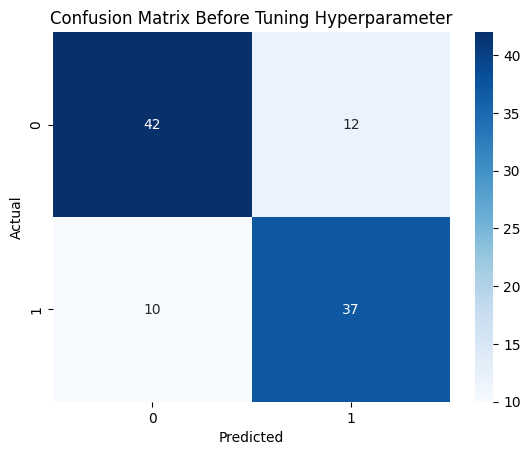

In [51]:
sns.heatmap(cm_before_tuning, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Before Tuning Hyperparameter')
plt.show()

### 🔵 Confusion Matrix After Tuning Hyperparameter

In [52]:
cm_after_tuning = confusion_matrix(y_test, y_pred_train_tuning)

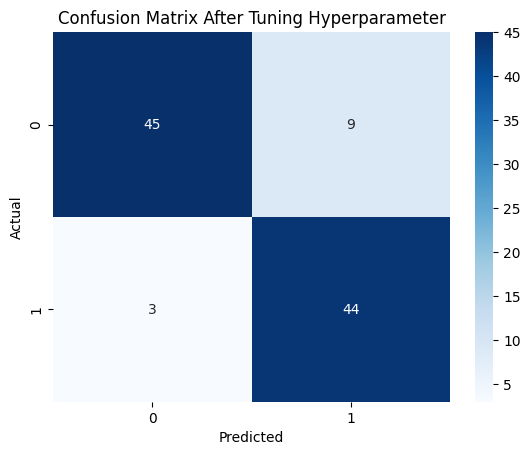

In [53]:
sns.heatmap(cm_after_tuning, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix After Tuning Hyperparameter')
plt.show()

<div class='alert alert-success'>

🎯 Perbandingan Performa :
- Sebelum di tuning : 0.78
- Setelah di tuning : 0.88

Dari 101 data, Machine Learning ini mampu menebak 88 data dengan benar (87.13 %)

</div>

## 📖 Reference

-   https://www.kaggle.com/
-   https://www.dicoding.com/blog/machine-learning-adalah/
-   https://www.ibm.com/id-id/topics/support-vector-machine
-   https://scikit-learn.org/stable/modules/svm.html
-   https://scikit-learn.org/dev/modules/generated/sklearn.metrics.confusion_matrix.html
-   https://altair-viz.github.io/gallery/index.html#example-gallery

##
<div class="alert alert-danger"><center>
      <summary><b>END
</div> 